In [2]:
import sys
sys.path.insert(0, '../') 
import sphereGIS 
import geopandas
import datastructure
import matplotlib.pyplot as plt

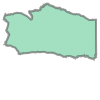

In [3]:
polygons = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))#[4:5]
polygons = polygons[polygons.name =='United States of America']

# 3:4 is trinidad
#polygons = geopandas.read_file('../data/caribbean.gpkg')[3:4]

polygons = geopandas.read_file('data/santa_barbara.gpkg')
polygons.iloc[0].geometry[0]

In [4]:
geom = polygons.iloc[0].geometry
polygon = datastructure.SphericalPolygon(geom)
polygon.get_convex()

In [5]:
fname = 'data/MOD09.A2020032.1940.006.2020034015024.hdf'
mod09 = datastructure.Mod09(fname)

In [6]:
# Getting Candidates
inside_convex = mod09.intersects_convex(polygon.convex_edges)

lon = mod09.lon[inside_convex]
lat = mod09.lat[inside_convex]

In [7]:
convex_points = geopandas.GeoDataFrame({'geom': geopandas.points_from_xy(lon, lat)}).set_geometry('geom')

In [10]:
inside_polygon = mod09.inside_polygon(polygon)

lon = mod09.lon[inside_polygon]
lat = mod09.lat[inside_polygon]

polygon_points = geopandas.GeoDataFrame({'geom': geopandas.points_from_xy(lon, lat)}).set_geometry('geom')

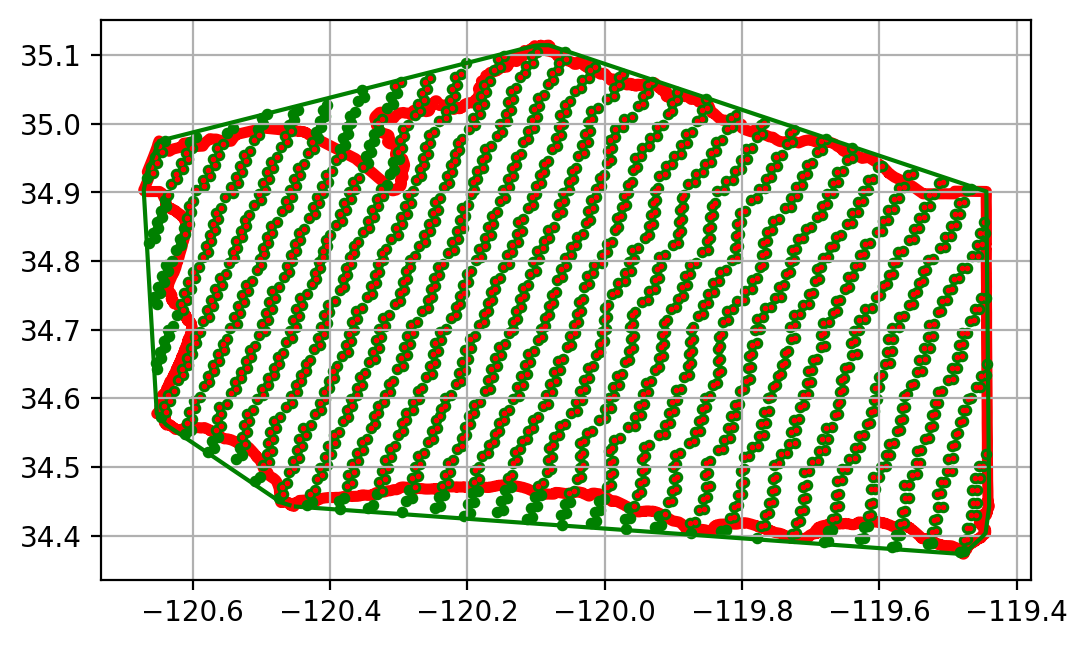

In [11]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

polygon.convex_nodes.as_line_df().plot(ax=ax, color='green')

polygons.plot(ax=ax, color='white', edgecolor='red', linewidth=4)
convex_points.plot(ax=ax, color='green', markersize=10)
polygon_points.plot(ax=ax, color='red', markersize=1)
fig.savefig('polygon_intersect')